# Matching problems
## Lecture 7

In terms of graph theory, marriage is considered a matching problem.

Today we'll talk about a matching algorithm that's used everywhere: for dating websites... for resource allocation... etc.

You have a graph where edges represent compatibility.

The goal is to create a maximum number of compatible pairs.

Def: Given a graph $G=(V,E)$ a **matching** is a subgraph of $G$ where every node has degree 1.

$\{x_1-x_2,x_3-x_5\}$ is a matching of size 2.

[[0 0 1 1 1 0 0]
 [0 0 0 1 1 1 0]
 [1 0 0 0 0 1 0]
 [1 1 0 0 1 0 1]
 [1 1 0 1 0 0 1]
 [0 1 1 0 0 0 0]
 [0 0 0 1 1 0 0]]


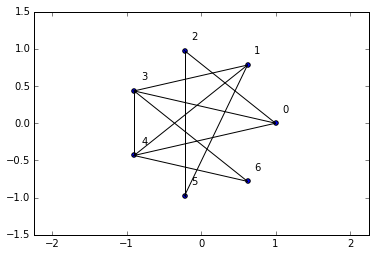

In [67]:
import numpy as np

def RandMatrix(m=5):
    rand = np.random.rand(m,m)
    for i in range(len(rand)):
        for j in range(len(rand[0])):
            rounded = int(rand[i,j] + 0.5)
            rand[i,j] = rounded
    return rand

def DeleteDiag(matrix):
    for i in range(len(matrix)):
        matrix[i,i] = 0
    return matrix

def DirectedGraph(m=5):
    rand = RandMatrix(m)
    rand = DeleteDiag(rand) # no self-connections
    return rand

def UndirectedGraph(m=5):
    rand = DirectedGraph(m)
    for i in range(len(rand)):
        for j in range(len(rand[0])):
            if i>j:
                rand[i,j] = rand[j,i]
    return rand

m = 7
sampleGraph = np.array(([ 0,  0,  1,  1,  1,  0,  0],
               [ 0,  0,  0,  1,  1,  1,  0],
               [ 1,  0,  0,  0,  0,  1,  0],
               [ 1,  1,  0,  0,  1,  0,  1],
               [ 1,  1,  0,  1,  0,  0,  1],
               [ 0,  1,  1,  0,  0,  0,  0],
               [ 0,  0,  0,  1,  1,  0,  0]))
print sampleGraph


import matplotlib.pyplot as plt
from pylab import axes
import numpy as np
%matplotlib inline
from math import *
# Plot each node in a circle

# Find the number of nodes (=m)

# Divide 2pi by the number of nodes
arc = 2*pi / m

# Assign a unique x,y position to each node
xnode = np.zeros(m)
ynode = np.zeros(m)
for i in range(m):
    xnode[i] = cos(arc*i)
    ynode[i] = sin(arc*i)

# Draw lines between nodes only if they were connected in the 
# undirected graph structure

for xi1, yi1 in zip( range((len(xnode))), range((len(ynode))) ):
    for xi2, yi2 in zip( range((len(xnode))), range((len(ynode))) ):
        if xi2 > xi1:
            if sampleGraph[xi1,xi2]:
                x1 = xnode[xi1]; y1 = ynode[yi1]
                x2 = xnode[xi2]; y2 = ynode[yi2]
                plt.plot([x1,x2],[y1,y2], color='black')
plt.scatter(xnode,ynode)
# Label the nodes
for i in range(m):
    plt.text(xnode[i]+.1,ynode[i]+.15, i)
axes().set_aspect('equal', 'datalim')
plt.show() 




In the above example, $\{x_6-x_3,x_0-x_2\}$ is a matching with two edges (so we say it has size 2).

$\{x_6-x_3,x_0-x_2,x_4-x_1\}$ is a matching of size 3

Def: A matching is **perfect** if it has size $\frac{|V|}{2} $

Def: The **weight** of a matching $\mathbb{M}$ is the sum of the weights on the edges in $\mathbb{M}$

Def: A **min-weight matching** for $G$ is a perfect matching for $G$ with the minimum weight.

Def: Given a matching $\mathbb{M}$, $x$ and $y$ form a **rogue couple** if they prefer each other over their mates in $\mathbb{M}$

Rogue couples create instability.

Def: A matching is **stable** if there are no rogue couples.

Rule: your preferences can't change over time.

##### Goal: Find a perfect matching that is stable.

Professor claims: if you have a bipartite graph (boys only prefer girls, and vice versa), it is always possible to find perfect matchings.

If you allow a not-bipartite graph (boys can prefer boys), then it is not always possible to find a perfect matching.

## Matching data structure

We need a new data structure, where instead of just a graph, we have a graph with preferences.

Example:

Alex prefers Bobby Joe
Bobby Joe prefers Robin
Robin prefers Alex
(love triangle)
and then there's Mergatoid, who is the third choice for Alex, Bobby Joe, and Robin.  (Mergatoid's preferences don't really matter.)


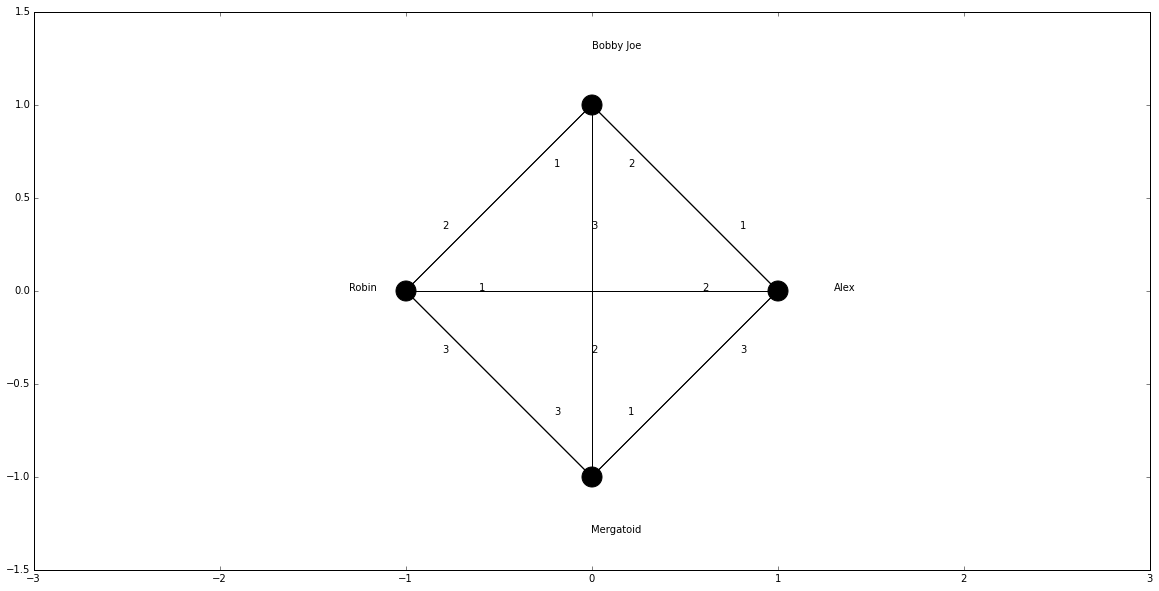

In [68]:
# Mergatoid graph with preferences
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pylab import axes
import numpy as np
%matplotlib inline
from math import *

# Plot each node in a circle

# Alex = index 0
# Bobby Joe = index 1
# Robin = index 2
# Mergatoid = index 3

# Preferences
# 0 = no edge (there are no self-edges)
# 1 = first preference
# 2 = second preference
# 3 = third preference
# note that I don't love this non-monotonic structure, but otherwise it works well

# Each row in the structure represents that person's preference
plt.figure(figsize=(20,10))
m = 4
lovers = ['Alex', 'Bobby Joe', 'Robin', 'Mergatoid']
loveTriangle = np.array(([ 0,  1,  2,  3],
               [ 2,  0,  1,  3],
               [ 1,  2,  0,  3],
               [ 1,  2,  3,  0]))


# Find the number of nodes (=m)

# Divide 2pi by the number of nodes
arc = 2*pi / m

# Assign a unique x,y position to each node
xnode = np.zeros(m)
ynode = np.zeros(m)
for i in range(m):
    xnode[i] = cos(arc*i)
    ynode[i] = sin(arc*i)

# Plot each node
plt.scatter(xnode,ynode,s=400,color='black')

# Plot a line if connected
for xi1, yi1 in zip( range((len(xnode))), range((len(ynode))) ):
    for xi2, yi2 in zip( range((len(xnode))), range((len(ynode))) ):
        if loveTriangle[xi1,xi2]:
            x1 = xnode[xi1]; y1 = ynode[yi1]
            x2 = xnode[xi2]; y2 = ynode[yi2]
            plt.plot([x1,x2],[y1,y2], color='black')
            # Label that preference
            xvec = x2-x1
            yvec = y2-y1
            plt.text(xnode[xi1] + xvec/5 ,ynode[xi1] + yvec/3,loveTriangle[xi1,xi2])
            
                

# Label the nodes
for i in range(m):
    plt.text(xnode[i]*1.3,ynode[i]*1.3, lovers[i])
axes().set_aspect('equal', 'datalim')

# Label the preferences
#for i in range(m):
    
plt.show()



In [69]:
# Future work: draw colore arrows

colors = cm.rainbow(np.linspace(0, 1, m)) 
print colors

[[  5.00000000e-01   0.00000000e+00   1.00000000e+00   1.00000000e+00]
 [  1.66666667e-01   8.66025404e-01   8.66025404e-01   1.00000000e+00]
 [  8.33333333e-01   8.66025404e-01   5.00000000e-01   1.00000000e+00]
 [  1.00000000e+00   1.22464680e-16   6.12323400e-17   1.00000000e+00]]


Theorem: $\neg \ \exists$ a stable matching for the graph above.

Proof: By contradiction.  Assume $\exists$ stable matching $\mathbb{M}$.  If it's a stable matching, Mergatoid has to get married to somebody.  Then Mergatoid is matched with someone in $\mathbb{M}$.  WLOG (by symmetry), assume Mergatoid is matched to Alex.  Alex and Robin form a rogue couple.  $\therefore \mathbb{M}$ not stable.

### Stable marriage problem

This problem is known as the stable marriage problem.

- Assume $N$ boys and $N$ girls.  (Equal number of boys and girls.)
- Each boy has his own ranked list of all the girls
- Each girl has her own ranked list of all the boys
- Goal is to find a perfect matching without rogue couples

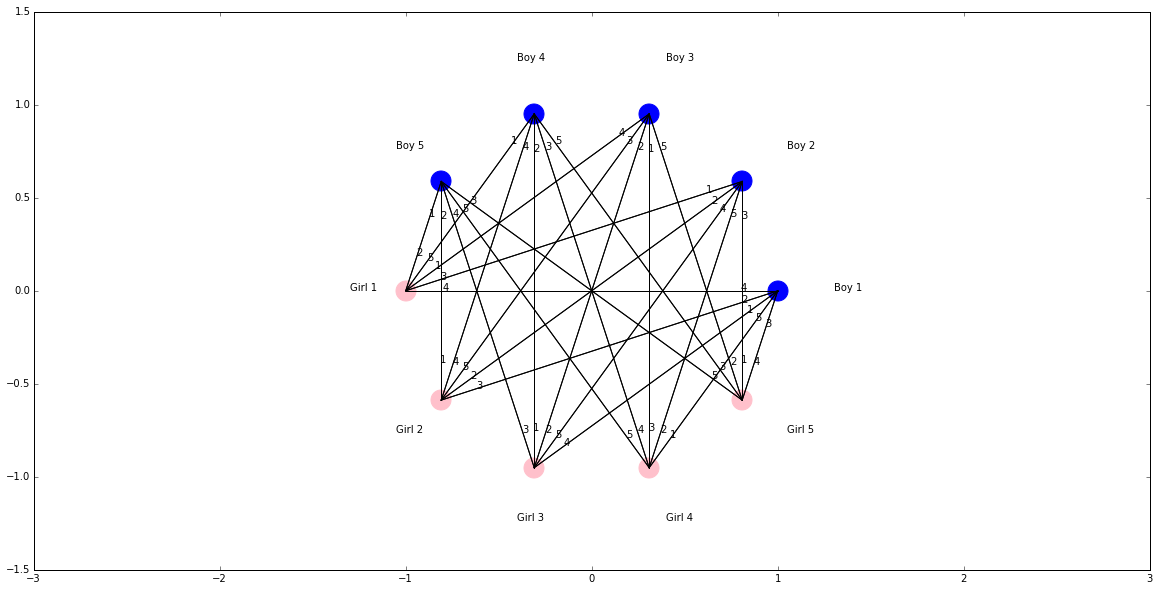

In [92]:
# Mergatoid graph with preferences
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pylab import axes
import numpy as np
%matplotlib inline
from math import *

# Plot each node in a circle

# Alex = index 0
# Bobby Joe = index 1
# Robin = index 2
# Mergatoid = index 3

# Preferences
# 0 = no edge (there are no self-edges)
# 1 = first preference
# 2 = second preference
# 3 = third preference
# note that I don't love this non-monotonic structure, but otherwise it works well

# Each row in the structure represents that person's preference
plt.figure(figsize=(20,10))
N = 5
Boys = np.linspace(1,N,N)
Girls = np.linspace(1,N,N)
BoyNames = []
GirlNames = []
for boy in Boys:
    BoyNames.append('Boy ' + str(int(boy)) )
for girl in Girls:
    GirlNames.append('Girl ' + str(int(girl)) ) 
BoysAndGirls = BoyNames; 
for girl in GirlNames: 
    BoysAndGirls.append(girl)

loveIsland = np.array(([ 0, 0, 0, 0, 0, 4, 2, 1, 5, 3], #Boy 1 = 1
                       [ 0, 0, 0, 0, 0, 1, 2, 4, 5, 3], #Boy 2 = 2
                       [ 0, 0, 0, 0, 0, 4, 3, 2, 1, 5], #Boy 3 = 3
                       [ 0, 0, 0, 0, 0, 1, 4, 2, 3, 5], #Boy 4 = 4
                       [ 0, 0, 0, 0, 0, 1, 2, 4, 5, 3], #Boy 5 = 5
                       [ 4, 3, 1, 5, 2, 0, 0, 0, 0, 0], #Girl 1 = 6
                       [ 3, 2, 5, 4, 1, 0, 0, 0, 0, 0], #Girl 2 = 7
                       [ 4, 5, 2, 1, 3, 0, 0, 0, 0, 0], #Girl 3 = 8
                       [ 1, 2, 3, 4, 5, 0, 0, 0, 0, 0], #Girl 4 = 9
                       [ 4, 1, 2, 3, 5, 0, 0, 0, 0, 0]))#Girl 5 = 10


# Find the number of nodes (=m)

# Divide 2pi by the number of nodes
m = N*2
arc = 2*pi / m

# Assign a unique x,y position to each node
xnode = np.zeros(m)
ynode = np.zeros(m)
for i in range(m):
    xnode[i] = cos(arc*i)
    ynode[i] = sin(arc*i)

# Plot each node

plt.scatter(xnode[:N],ynode[:N],s=400,color='blue')
plt.scatter(xnode[N:],ynode[N:],s=400,color='pink')

# Plot a line if connected
for xi1, yi1 in zip( range((len(xnode))), range((len(ynode))) ):
    for xi2, yi2 in zip( range((len(xnode))), range((len(ynode))) ):
        if loveIsland[xi1,xi2]:
            x1 = xnode[xi1]; y1 = ynode[yi1]
            x2 = xnode[xi2]; y2 = ynode[yi2]
            plt.plot([x1,x2],[y1,y2], color='black')
            # Label that preference
            xvec = x2-x1
            yvec = y2-y1
            length = sqrt(xvec**2 + yvec**2)
            xvec = xvec/length
            yvec = yvec/length
            plt.text(xnode[xi1] + xvec/5 ,ynode[xi1] + yvec/5,loveIsland[xi1,xi2])
            
                

# Label the nodes
for i in range(m):
    plt.text(xnode[i]*1.3,ynode[i]*1.3, BoysAndGirls[i])
axes().set_aspect('equal', 'datalim')
    
plt.show()

### The Greedy Algorithm

Go down and give each boy the best choice available.

- Boy 1 gets first choice, Girl 3
- Boy 2 gets first choice, Girl 1
- Boy 3 gets first choice, Girl 4
- Boy 4 gets fourth choice, Girl 2
- Boy 5 gets third choice, Girl 5

Boy 4 and Girl 3 form a Rogue Couple, so that didn't work!

How do we fix this?  How do we do better than the greedy algorithm?

You could start switching around rogue couples, but in doing that you might create other rogue couples.



### The Dating Algorithm

There is something more involved that works: "the dating algorithm".

Initial conditions

- Each of the $N$ boys has an ordered list of the girls they prefer
- Vice versa

Takes place over a few days.
Each day is broken up into morning, mid-day, and evening.
At each time, the girl goes 
